In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spotify_data.csv')

In [3]:
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  

In [4]:
unique_artists = df['artist_name'].nunique()
print("Number of unique artists: ", unique_artists)

Number of unique artists:  64159


In [5]:
average_popularity = df['popularity'].mean()
print("Average popularity: ", average_popularity)

Average popularity:  18.38312277325387


In [6]:
# Most Popular track
max_popularity = df['popularity'].max()
max_popular_track = df[df['popularity'] == max_popularity][['track_name', 'artist_name']]
print("Most popular track: ")
print(max_popular_track)

Most popular track: 
       track_name  artist_name
612503    Flowers  Miley Cyrus


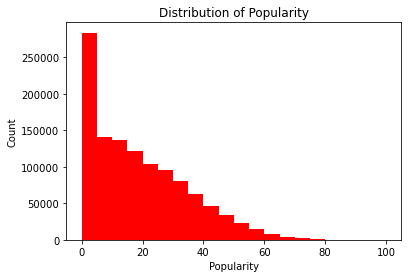

In [7]:
# Popularity Distribution
import matplotlib.pyplot as plt
plt.hist(df['popularity'], bins=20, color='red')
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title('Distribution of Popularity')
plt.show()

In [8]:
genre_counts = df['genre'].value_counts()
print("Genre Counts:")
print(genre_counts)


Genre Counts:
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: genre, Length: 82, dtype: int64


In [9]:
average_danceability = df['danceability'].mean()
average_energy = df['energy'].mean()
print("Average danceability: ", average_danceability)
print("Average energy: ", average_energy)

Average danceability:  0.5374382319161484
Average energy:  0.6396698993142569


In [10]:
key_counts = df['key'].value_counts()
print("Key Counts: ")
print(key_counts)

Key Counts: 
7     139635
0     130081
2     123690
9     119293
1     112806
5      94032
4      91170
11     90955
6      76120
10     76038
8      70206
3      35738
Name: key, dtype: int64


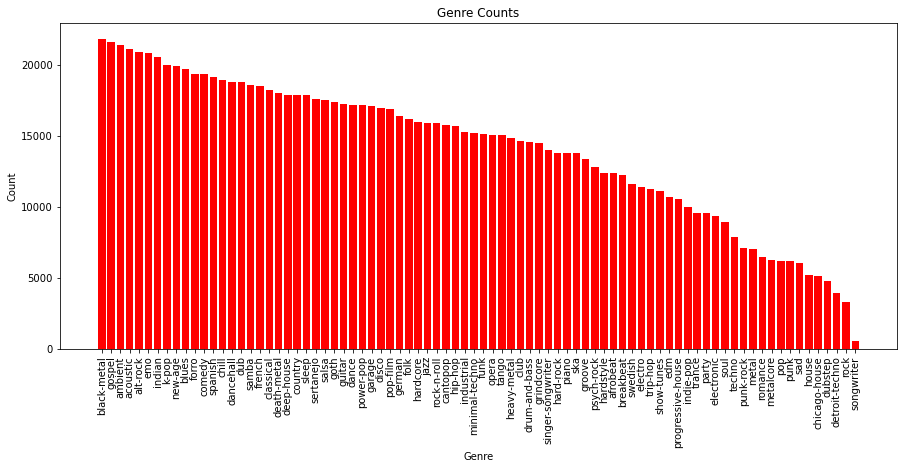

In [11]:
# Genre counts
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(15,6))
plt.bar(genre_counts.index, genre_counts.values, color='red')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=90)
plt.show()

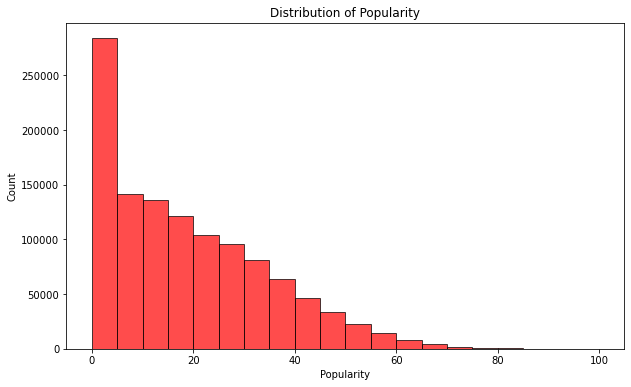

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['popularity'], bins=20, color='red', edgecolor='black', alpha=0.7, width=5)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

In [13]:
unique_genres = df['genre'].nunique()
print(f"The number of unique genres:{unique_genres}")

The number of unique genres:82


/home/huzaifa/miniconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


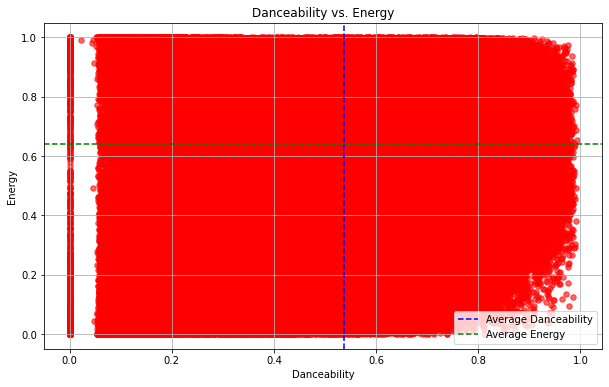

In [14]:
# Danceability vs Energy 
avg_danceability = df['danceability'].mean()
avg_energy = df['energy'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], s=30, alpha=0.6, color='red')
plt.axvline(avg_danceability, color='blue', linestyle='--', label='Average Danceability')
plt.axhline(avg_energy, color='green', linestyle='--', label='Average Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.grid(True)
plt.legend()
plt.show()


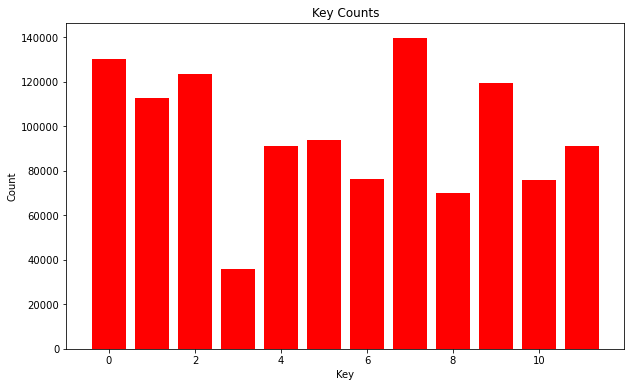

In [15]:
# Key Counts
key_counts = df['key'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(key_counts.index, key_counts.values, color='red')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title("Key Counts")
plt.show()

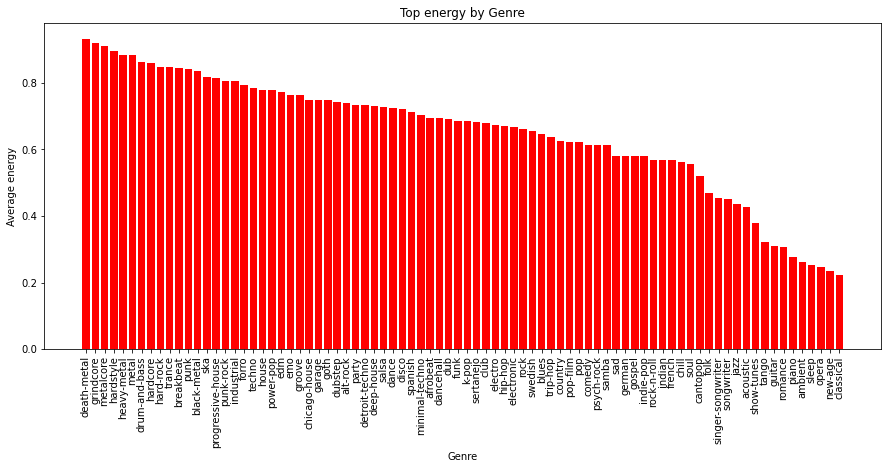

In [16]:
# Top danceability by Genre
genre_danceability = df.groupby('genre')['energy'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,6))
plt.bar(genre_danceability.index, genre_danceability.values, color='red')
plt.xlabel('Genre')
plt.ylabel('Average energy')
plt.title('Top energy by Genre')
plt.xticks(rotation=90)
plt.show()


In [17]:
# Clustering using K-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
data = pd.read_csv('spotify_data.csv')

In [19]:
features = data[['danceability', 'energy', 'key']]

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

/home/huzaifa/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [22]:
cluster_labels = kmeans.labels_

In [23]:
data['cluster'] = cluster_labels

In [24]:
# Clustered Genres

cluster_analysis = data.groupby('cluster')['genre'].unique()

for cluster, genres in cluster_analysis.items():
    print(f"Cluster {cluster}: {genres}")

Cluster 0: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'soul' 'spanish' 'swedish' 'tango'
 'techno' 'trance' 'trip-hop' 'songwriter']
Cluster 1: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classica

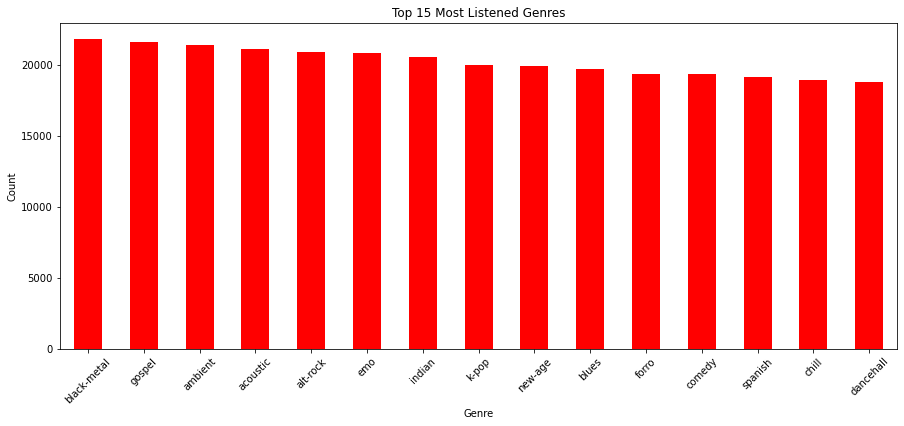

In [25]:
# Top Listed Genres

genre_counts = data['genre'].value_counts().head(15)

plt.figure(figsize=(15,6))
genre_counts.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Most Listened Genres')
plt.xticks(rotation=45)
plt.show()

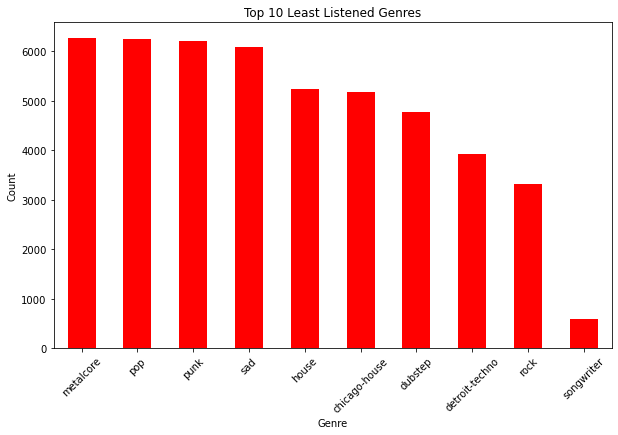

In [26]:
# Top 15 Least Heard Genres

genre_counts = data['genre'].value_counts().tail(10)

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Least Listened Genres')
plt.xticks(rotation=45)
plt.show()

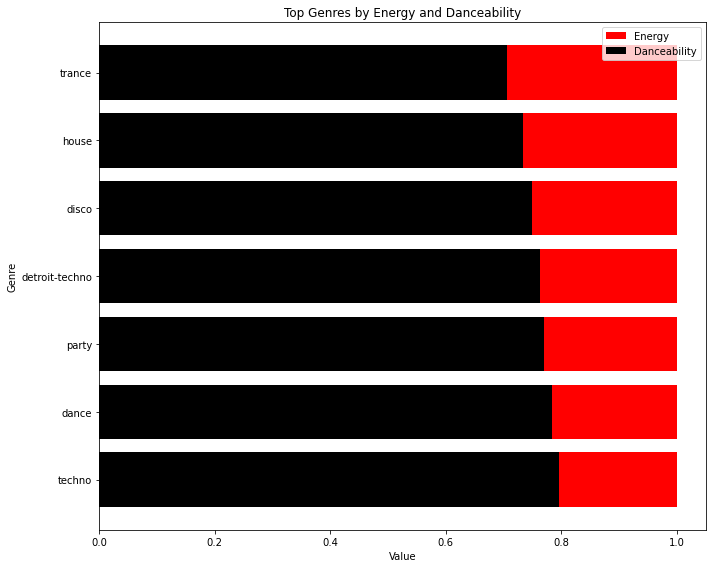

In [27]:
# Top Genres with both Energy and Danceability
sorted_data =  data.sort_values(by=['energy', 'danceability'], ascending=False)
top_20_data = sorted_data.head(20)

plt.figure(figsize=(10,8))
plt.barh(top_20_data['genre'], top_20_data['energy'], color='red', label='Energy')
plt.barh(top_20_data['genre'], top_20_data['danceability'], color='black', label='Danceability')
plt.xlabel('Value')
plt.ylabel('Genre')
plt.title('Top Genres by Energy and Danceability')
plt.legend()
plt.tight_layout()
plt.show()

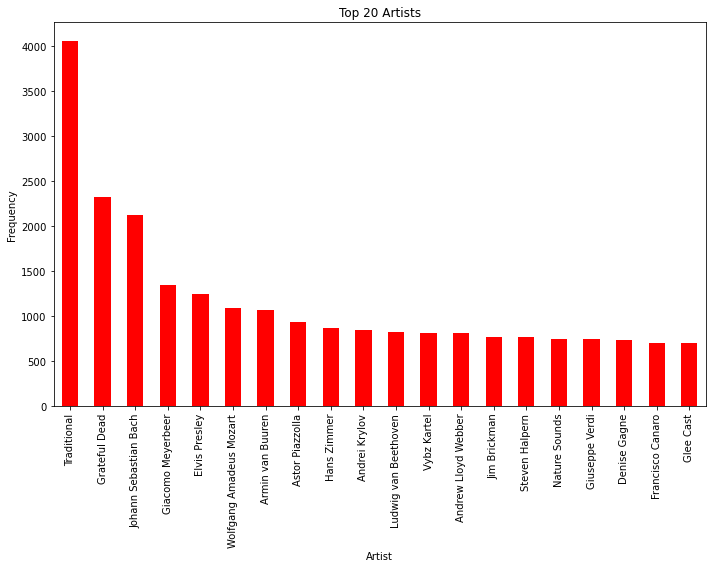

In [28]:
artists_counts = data['artist_name'].value_counts()

top_20_artists = artists_counts.head(20)

plt.figure(figsize=(10,8))
top_20_artists.plot(kind='bar', color='red')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.title('Top 20 Artists')
plt.tight_layout()
plt.show()

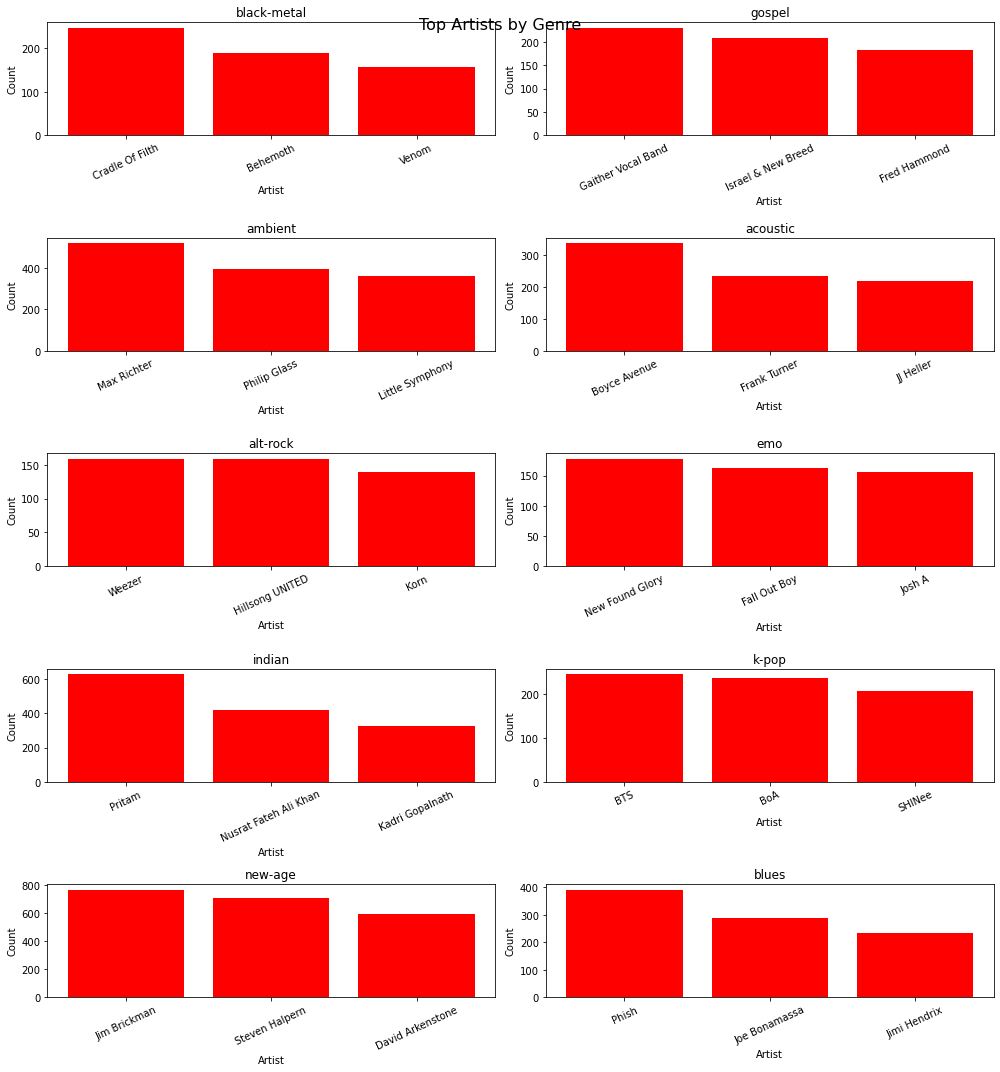

In [29]:
# Top Artist by genre
import matplotlib.pyplot as plt

top_10_genres = data['genre'].value_counts().head(10).index

plt.figure(figsize=(14, 15))

for i, genre in enumerate(top_10_genres):
    plt.subplot(5, 2, i+1)  # Create subplots for each genre
    genre_artist_counts = data[data['genre'] == genre]['artist_name'].value_counts().head(3)
    plt.bar(genre_artist_counts.index, genre_artist_counts.values, color='red')
    plt.title(genre)
    plt.xlabel('Artist')
    plt.xticks(rotation=25)
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Top Artists by Genre', fontsize=16)
plt.show()


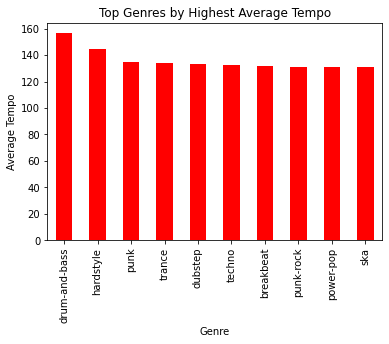

In [30]:
# Top Songs by tempo
genre_avg_tempo = data.groupby('genre')['tempo'].mean()
top_genres = genre_avg_tempo.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.title('Top Genres by Highest Average Tempo')
plt.show()

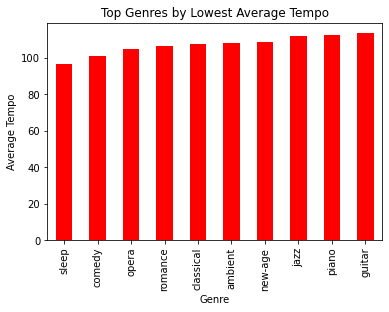

In [31]:
top_genres = genre_avg_tempo.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.title('Top Genres by Lowest Average Tempo')
plt.show()

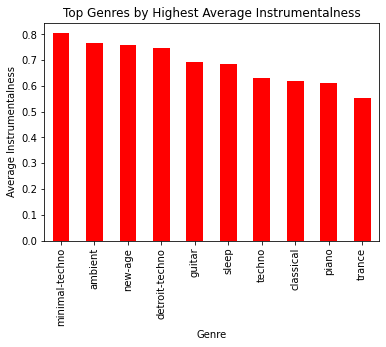

In [32]:
# Songs by Instrumentalness
genre_avg_instrumentalness = data.groupby('genre')['instrumentalness'].mean()

top_genres = genre_avg_instrumentalness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Instrumentalness')
plt.title('Top Genres by Highest Average Instrumentalness')
plt.show()


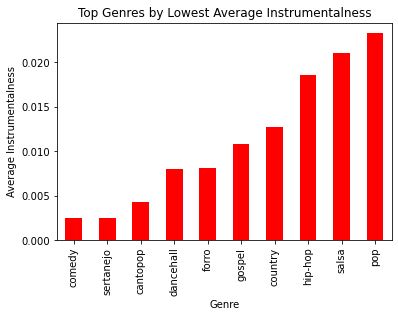

In [33]:
genre_avg_instrumentalness = data.groupby('genre')['instrumentalness'].mean()

top_genres = genre_avg_instrumentalness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Instrumentalness')
plt.title('Top Genres by Lowest Average Instrumentalness')
plt.show()

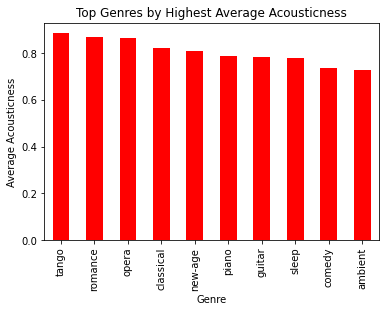

In [34]:
# Top Genres by Acouticness



genre_avg_acousticness = data.groupby('genre')['acousticness'].mean()

top_genres = genre_avg_acousticness.sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Acousticness')
plt.title('Top Genres by Highest Average Acousticness')
plt.show()

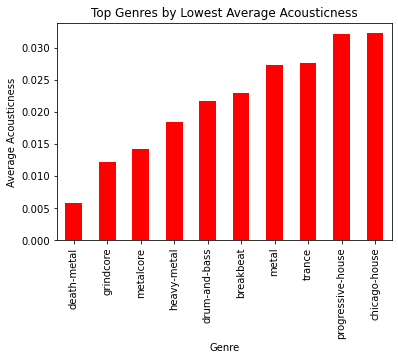

In [35]:
genre_avg_acousticness = data.groupby('genre')['acousticness'].mean()

top_genres = genre_avg_acousticness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Acousticness')
plt.title('Top Genres by Lowest Average Acousticness')
plt.show()

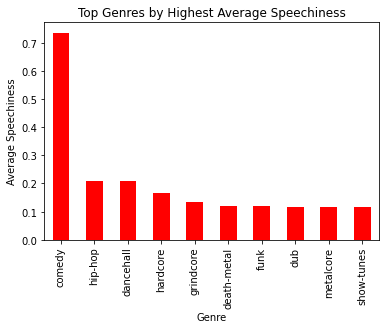

In [36]:
# Top Genres by Speechness



genre_avg_speechiness = data.groupby('genre')['speechiness'].mean()

top_genres = genre_avg_speechiness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Speechiness')
plt.title('Top Genres by Highest Average Speechiness')
plt.show()

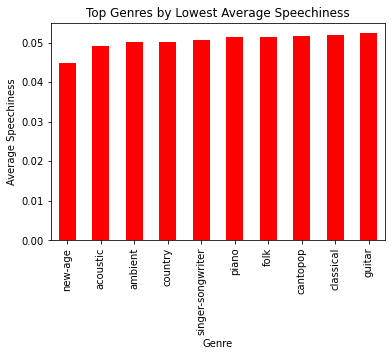

In [37]:
genre_avg_speechiness = data.groupby('genre')['speechiness'].mean()

top_genres = genre_avg_speechiness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Speechiness')
plt.title('Top Genres by Lowest Average Speechiness')
plt.show()

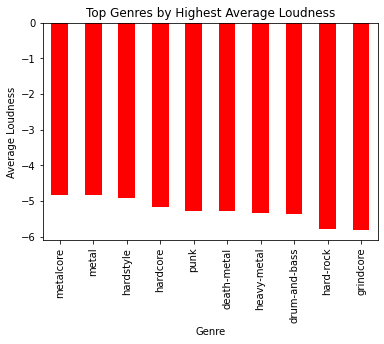

In [38]:

genre_avg_loudness = data.groupby('genre')['loudness'].mean()

top_genres = genre_avg_loudness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Top Genres by Highest Average Loudness')
plt.show()

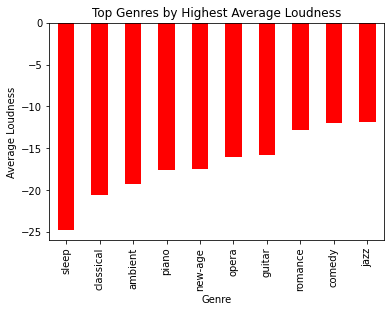

In [39]:
genre_avg_loudness = data.groupby('genre')['loudness'].mean()

top_genres = genre_avg_loudness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Top Genres by Highest Average Loudness')
plt.show()